# Video Games NLP Exploratory Analysis

Data from
> Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019
[https://nijianmo.github.io/amazon/index.html#files](https://nijianmo.github.io/amazon/index.html#files)

## Purpose

The purpose of this notebook is to read in and explore text reviews for video games from Amazon.com. These reviews were collected from 1996-2014. The dataset is labeled with star ratings and contains text reviews for purchased video games.

This particular analysis will explore the data, look for interesting features about the text, and describe basic properties of it.

In [1]:
# import packages
import numpy as np
import pandas as pd

In [2]:
# read in data
vg = pd.read_json('../Amazon_Data/Video_Games_5.json.gz', lines=True, compression='gzip')
vg.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [3]:
# choose only select columns and clean up the datatypes and missing values
vg = vg.loc[:,['overall', 'reviewText']]
vg = vg.dropna(how='any')
vg.loc[:,'overall'] = vg.overall.astype('int16')

In [4]:
# inspect the df info
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497419 entries, 0 to 497576
Data columns (total 2 columns):
overall       497419 non-null int16
reviewText    497419 non-null object
dtypes: int16(1), object(1)
memory usage: 8.5+ MB


In [5]:
# check out the distribution of ratings
vg.overall.value_counts()

5    299623
4     93644
3     49140
1     30879
2     24133
Name: overall, dtype: int64

The classes are heavily imbalanced, with far more positive ratings than negative. This analysis is not seeking to predict sentiment, therefore, the data will not be upsampled/downsampled right now.

The entire text data will be analyzed for interesting properties.

### Text Exploration

In [6]:
# import stop words from spacy
from  spacy.lang.en.stop_words import STOP_WORDS

In [7]:
# generate and edit stop words
stops = list(STOP_WORDS)
print(stops)

['mine', "'m", 'out', 'using', 'him', 'that', 'thence', '’ll', "'d", 'before', 'while', 'back', 'is', 'my', "'s", 'third', 'seeming', 'becoming', 'none', 'us', '‘ve', 'themselves', 'enough', 'upon', 'whose', 'n’t', 'are', 'more', 'just', 'name', 'even', 'serious', 'well', 'four', 'yourselves', 'when', 'both', 'done', 'beforehand', 'amount', 'at', 'where', '‘d', 'eight', 'though', 'hereupon', 'sometimes', 'twenty', 'anywhere', 'moreover', 'down', 'really', 'part', 'around', 'per', 'can', 'everywhere', 'sometime', 'one', 'off', 'did', 'nine', 'alone', 'her', 'ourselves', 'first', 'make', 'am', 'which', 'say', 'anyone', 'has', 'fifty', 'formerly', 'had', 'in', 'together', 'else', 'again', 'within', 'twelve', 'anything', 'toward', 'so', 'eleven', 'some', 'empty', 'besides', 'between', 'somewhere', 'whereafter', 'who', 'whoever', '‘ll', 'such', 'very', 'whereby', 'someone', 'neither', 'those', 'we', 'would', 'from', 'herein', 'yet', 'he', 'nobody', 'because', 'yours', 'your', 'ever', 'never

Preliminary analysis revealed some character conversion isses. Adding additional stop words.

In [8]:
# add additional stopwords
issue_words = ['\ufeff1', '\x16', '...', '\x10once', 's', '1', '2', '3', '4', '5']
stops.extend(issue_words)

In [9]:
print(stops)

['mine', "'m", 'out', 'using', 'him', 'that', 'thence', '’ll', "'d", 'before', 'while', 'back', 'is', 'my', "'s", 'third', 'seeming', 'becoming', 'none', 'us', '‘ve', 'themselves', 'enough', 'upon', 'whose', 'n’t', 'are', 'more', 'just', 'name', 'even', 'serious', 'well', 'four', 'yourselves', 'when', 'both', 'done', 'beforehand', 'amount', 'at', 'where', '‘d', 'eight', 'though', 'hereupon', 'sometimes', 'twenty', 'anywhere', 'moreover', 'down', 'really', 'part', 'around', 'per', 'can', 'everywhere', 'sometime', 'one', 'off', 'did', 'nine', 'alone', 'her', 'ourselves', 'first', 'make', 'am', 'which', 'say', 'anyone', 'has', 'fifty', 'formerly', 'had', 'in', 'together', 'else', 'again', 'within', 'twelve', 'anything', 'toward', 'so', 'eleven', 'some', 'empty', 'besides', 'between', 'somewhere', 'whereafter', 'who', 'whoever', '‘ll', 'such', 'very', 'whereby', 'someone', 'neither', 'those', 'we', 'would', 'from', 'herein', 'yet', 'he', 'nobody', 'because', 'yours', 'your', 'ever', 'never

In [10]:
# import additional nlp tools
import string
import spacy
from spacy.lang.en import English

In [11]:
# generate puntuations string
punctuations = string.punctuation

In [12]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# define custom tokenizers
parser = English()
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" 
                else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stops and word not in punctuations]
    return mytokens

In [14]:
# test the tokenizer with basic text
s = 'This video game was crazy! I though it was terrific!'
print(my_tokenizer(s))

['video', 'game', 'crazy', 'terrific']


In [15]:
# create word_list function
def get_word_list(text, word_list):
    for sentence in text:
        for word in my_tokenizer(sentence):
            word_list.append(word)

In [16]:
# generate word_list
word_list = []
get_word_list(vg.reviewText, word_list)

In [17]:
# inspect the first 20 words
word_list[:20]

['game',
 'bit',
 'hard',
 'hang',
 'great',
 'played',
 'alright',
 'steam',
 'bit',
 'trouble',
 'game',
 'steam',
 'hard',
 'time',
 'activating',
 'playing',
 'game',
 'spite',
 'fun',
 'liked']

In [18]:
# check for anomalous words that start with a randomly chosen special character
for word in word_list:
    if word.startswith('\\'):
        print(word)

\/+b
\/+b
\"water
\/
\"water
\control
\jameson
\save_game
\save_game
\load_game
\save_game
\the
\/\/ords
\(^u^)/
\/
\/
\now
\have
\my
\\\
\(^0^)/
\|;;|
\and
\|;;|
\and
\program
\.
\much
\.
\m/
\ps3\update
\ps3\savedata
\ps3\export\psv
\m/
\m/(>_<)\m/
\m/\m/
\/.\/
\so
\\=()=//
\m/
\m/
\t/
\[t]/
\best
\_()_/.
\o/
\"water
\\
\(^u^)/


Custom tokenizer only removes tokens that contain individual puntuation marks, not words or tokens that consist of multiple punctuation marks or punctuation marks that have other characters in the token.

In [19]:
# define remove chars function
import re

def rmv_spec_chars(sentence):
    # completely remove most punctuation
    sentence = re.sub("[\\\[\]@_!#$%^&*()<>?/\|}{~:']", '', sentence)
    
    # replace hypens with spaces to split those words
    sentence = re.sub('-', ' ', sentence)
    
    return sentence

In [20]:
# test the function
rmv_spec_chars("This 'is' going * to be! a test \/(--)\/ train-test-split")

'This is going  to be a test    train test split'

In [21]:
# test the function with the tokenizer
my_tokenizer(rmv_spec_chars("This 'is' going * to be! a test \/(--)\/ train-test-split"))

['going', 'test', 'train', 'test', 'split']

The above tokens are what we want, so going to process the text again.

In [22]:
# edit tokenizer to deal with tokens with special characters
def my_tokenizer(sentence):
    sentence = rmv_spec_chars(sentence)
    mytokens = parser(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" 
                else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stops and word not in punctuations]
    return mytokens

In [23]:
# get a list of all words each time they occur in the reviews
# using new tokenizer in the get_word_list function
word_list = []
get_word_list(vg.reviewText, word_list)

In [24]:
# check for anomalous words that start with a randomly chosen special character
for word in word_list:
    if word.startswith('\\'):
        print(word)

No output from function above means we at least took care of the issue from before.

In [25]:
# display the total number of words included in the vocabulary
# stop words and special characters (emojis) have been removed
# this includes the total number of words, not the unique words
print('The number of words in the reviews is {}'.format(len(word_list)))

The number of words in the reviews is 26737141


#### Generating summary stats for the words and appearances

In [26]:
from collections import Counter, defaultdict

# get a count of every word
token_counts = Counter(word_list)

In [27]:
# find the number of unique words in the reviews
# stop words excluded
print('The total number of unique words is {}'.format(len(token_counts)))

The total number of unique words is 262853


In [28]:
# inspect the 20 most common words
token_counts.most_common(20)

[('game', 1005566),
 ('like', 289507),
 ('games', 258372),
 ('play', 205701),
 ('great', 196388),
 ('good', 189185),
 ('time', 160423),
 ('fun', 157620),
 ('new', 109199),
 ('story', 105186),
 ('graphics', 101838),
 ('playing', 95668),
 ('better', 88596),
 ('way', 86514),
 ('use', 83389),
 ('played', 82432),
 ('best', 80431),
 ('love', 77536),
 ('lot', 75079),
 ('little', 72177)]

#### Generate some basic visualizations for the number of word appearances

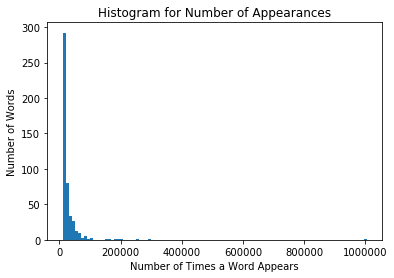

In [29]:
import matplotlib.pyplot as plt

# create histogram of word appearances
# most words occur infrequently, so threshold for num influences this plot greatly
values = []
for tup in token_counts.most_common():
    word, num = tup
    if num > 10000:
        values.append(num)
_ = plt.hist(values, bins=100)
_ = plt.title('Histogram for Number of Appearances')
_ = plt.xlabel('Number of Times a Word Appears')
_ = plt.ylabel('Number of Words')

This histogram shows that most words appear infrequently, but there are a few words that appear way more than the others.

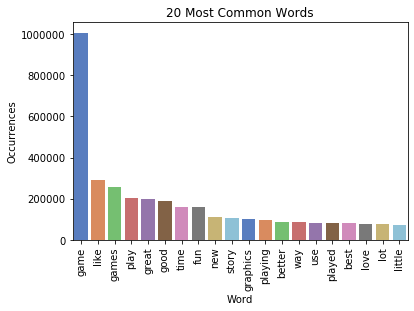

In [30]:
import seaborn as sns

# plot the 20 most common words
words = []
values = []
for tup in token_counts.most_common(20):
    word, num = tup
    words.append(word)
    values.append(num)
_ = sns.barplot(words, values, palette='muted')
_ = plt.xticks(rotation=90)
_ = plt.title('20 Most Common Words')
_ = plt.xlabel('Word')
_ = plt.ylabel('Occurrences')

Next, we will analyze the number of reviews in which each word appears.

In [31]:
# get a count of the number of reviews where a word appears

def get_num_docs(text_series):
    """Take a text series and and return a default dict."""
    
    # initialize default dict
    num_docs = defaultdict(int)
    
    # iterate through and populate the default dict
    for text in text_series:
        ls = []
        for word in my_tokenizer(text):
            if word not in ls:
                ls.append(word)
        for x in ls:
            num_docs[x] += 1
            
    # return the default dict
    return num_docs

In [32]:
# get the number of docs in which each word appears
num_docs = get_num_docs(vg.reviewText)

In [33]:
# store a list of the number of appearances for each word
apps = []
for key, val in num_docs.items():
    apps.append(val)

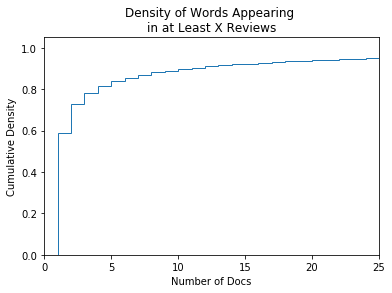

In [34]:
# plot the cdf for the number of reviews where each word appears
_ = plt.hist(apps, cumulative=True, histtype='step', density=True, bins=np.arange(100))
_ = plt.xlim(0,25)
_ = plt.xlabel('Number of Docs')
_ = plt.ylabel('Cumulative Density')
_ = plt.title('Density of Words Appearing \nin at Least X Reviews')

So about 60% of the words in the vocabulary appear in only one review! When creating the sentiment analysis model, it could be useful to set a minimum appearance of 2.

The next visualization for the words will be a wordcloud using the WordCloud class.

In [35]:
# import wordcloud
from wordcloud import WordCloud

In [36]:
# initialize wordcloud object
wc = WordCloud(background_color='white', stopwords=stops, max_words=200, 
               max_font_size=40, scale=3, random_state=42)

In [37]:
# generate the wordcloud
wc.generate(' '.join(word_list))

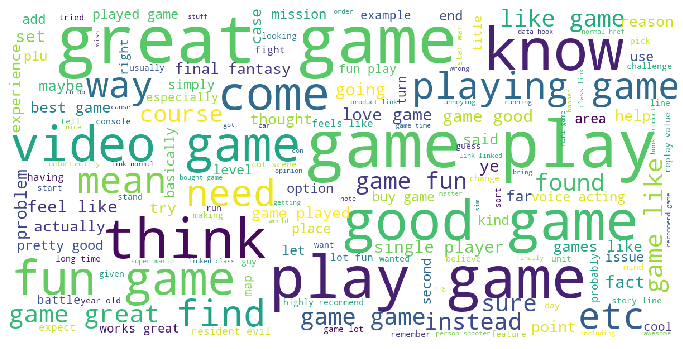

In [38]:
# show the wordcloud
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wc)
plt.show()

## Summary of Exploratory Analysis

The text data had some very interesting features. It was surprising to find many special characters and emojis in the data. For this analysis, these were removed, and the analysis was performed on the clean text. I think this is a very important result, given that this was not much of an issue when I was originally working with book reviews. 

This shows the importance of understanding the particular dataset for the problem. While the book reviews came from the same source (Amazon for the years 1996-2014), the content was different enough to require different preprocessing techniques. 

Plotting word counts showed that over half of the words only appeared in one review. The most common words were plotted, and unsurprisingly, the most common word was game. If using standard models to predict sentiment of reviews, it would be recommended to include only words that appear in two or more reviews.

For the Flair sentiment analysis model, see the 2_Video_Games_Flair_Model.ipynb file.